

```
# This is formatted as code
```

# Stock Price Prediction

In [ ]:
# Import Packages
import requests
import pandas as pd
from fbprophet import Prophet
import time
import numpy as np

# Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# Import data from Alpha Advantage for selected stock
# Add 30 second delay to prevent reaching API limit of 5 calls per minute

# Create list of stock tickers to loop over
tickers = ['DFS','JPM','AXP','C','BAC','USB','WFC']

# Create URL for AlphaVantage API call
apiKey = 'MH7YI4PH913XPSUP'
func = 'TIME_SERIES_DAILY'

#Create empty dataframe to store results of all tickers
df = pd.DataFrame()

# Loop over tickers and concatenate results to dataframe
for i in tickers:
  # Create empty dataframe to store results of loop
  df_tmp = pd.DataFrame()
  df_temp = pd.read_csv('https://www.alphavantage.co/query?function='+func+'&symbol='+i+'&apikey='+apiKey+'&datatype=csv&outputsize=full'
) 
  df_temp['ticker'] = i
  df = pd.concat([df, df_temp], axis=0)

  # Wait 30 seconds before next running loop
  time.sleep(30)

In [ ]:
# Write data to CSV for use later
df.to_csv('stock_data.csv')

In [ ]:
# View data sample
df.head()

,timestamp,open,high,low,close,volume,ticker
0,2022-07-26,99.00000,100.16000,98.09000,98.36000,1567767,DFS
1,2022-07-25,100.00000,100.81000,98.21000,100.02000,2002694,DFS
2,2022-07-22,99.59000,101.30000,99.07000,100.00000,2633650,DFS
3,2022-07-21,102.01000,103.14000,98.30000,100.00000,6521437,DFS
4,2022-07-20,108.49000,109.94500,107.96000,109.80000,2425198,DFS


In [ ]:
# View data shape
df.shape

(38126, 7)

In [ ]:
# Verify all data has been selected
df['ticker'].value_counts()

JPM    5720
AXP    5720
C      5720
BAC    5720
USB    5720
WFC    5720
DFS    3806
Name: ticker, dtype: int64

In [ ]:
# Check date ranges of selected tickers
for i in tickers:
  print(i)
  tmp = df[df.ticker==i]
  print('Minimum Date in Data '+str(min(tmp['timestamp'])))
  print('Maximum Date in Data '+str(max(tmp['timestamp'])))

DFS
Minimum Date in Data 2007-06-14
Maximum Date in Data 2022-07-26
JPM
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-26
AXP
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-26
C
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-26
BAC
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-26
USB
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-26
WFC
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-07-26


In [ ]:
# Check Format of date field
df['timestamp'].dtype

dtype('O')

In [ ]:
# Convert timestamp to datetime data type
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')

In [ ]:
# Check Format of date field after change
df['timestamp'].dtype


dtype('<M8[ns]')

In [ ]:
# Check output of changed date field
df['timestamp']

0      2022-07-26
1      2022-07-25
2      2022-07-22
3      2022-07-21
4      2022-07-20
          ...    
5715   1999-11-05
5716   1999-11-04
5717   1999-11-03
5718   1999-11-02
5719   1999-11-01
Name: timestamp, Length: 38126, dtype: datetime64[ns]

In [ ]:
# Create dataframe to analyze close value
df = df[['ticker','close','timestamp']]

# View Stats of Data 

In [ ]:
# View statistical details of all tickers

# Initialize DataFrame with statistics on closing column for all stock
df_desc = df.describe()
df_desc.rename(columns={'close':'all'},inplace = True)

# Add columns to DataFrame with statistics on closing column for each stock
for i in tickers:
  df_n = df[(df.ticker==i)]
  df_n_desc = df_n.describe()
  df_n_desc.rename(columns={'close':i},inplace = True)
  df_desc = pd.concat([df_desc, df_n_desc], axis=1)

print("Closing Stock Price Summary Statistics")  
df_desc

Closing Stock Price Summary Statistics


,all,DFS,JPM,AXP,C,BAC,USB,WFC
count,38126.00000,3806.00000,5720.00000,5720.00000,5720.00000,5720.00000,5720.00000,5720.00000
mean,49.14313,51.81464,62.96439,71.42865,45.09183,34.45394,35.16919,43.97322
std,28.54789,30.36424,35.01464,37.00227,18.97208,20.86484,11.86619,11.89401
min,1.02000,4.89000,15.45000,10.26000,1.02000,3.14000,8.82000,8.12000
25%,30.97250,23.41000,38.49000,45.80000,37.98750,15.75000,25.03750,33.76000
50%,45.81000,54.27000,47.36000,57.71500,48.27000,29.92000,32.44000,46.25500
75%,57.74000,70.57500,83.91750,89.76250,54.88000,48.27250,43.67000,53.17500
max,198.38000,135.38000,171.78000,198.38000,81.91000,89.01000,63.25000,73.00000


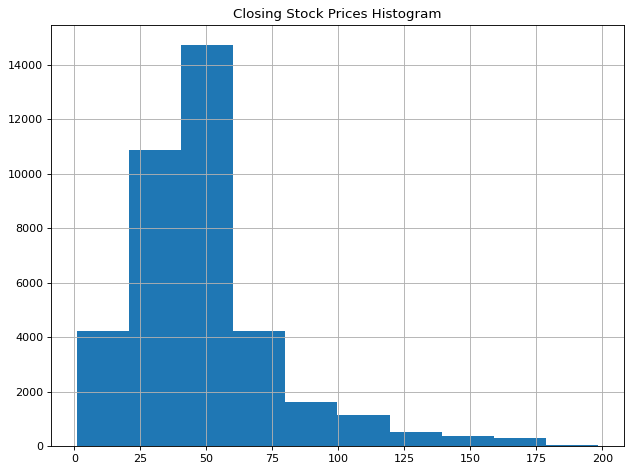

In [ ]:
# View Histogram of Data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df['close'].hist()
plt.title('Closing Stock Prices Histogram')
plt.tight_layout()
plt.show()

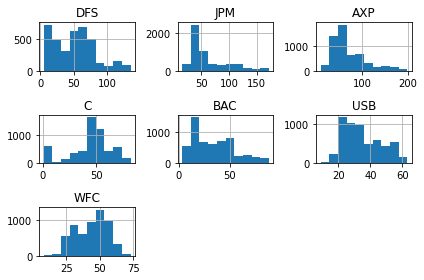

In [ ]:
# View histogram for each stock
n=1
for i in tickers:
  df_n = df[(df.ticker==i)]
  plt.subplot(3,3,n)
  df_n['close'].hist()
  plt.title(i)
  plt.tight_layout()
  n=n+1

plt.show()

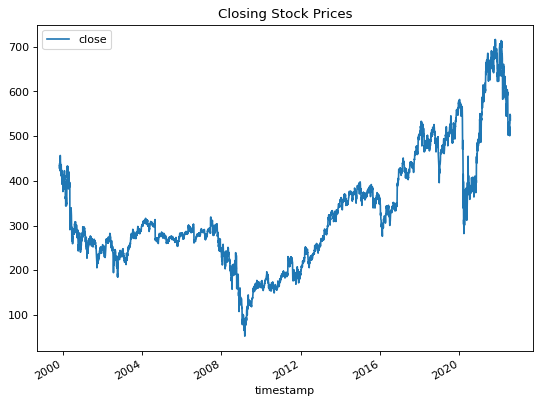

In [ ]:
# Plot closing prices for all stocks over time
figure(figsize=(8, 6), dpi=80)

ax = plt.gca()
df_sum = df.groupby(['timestamp']).sum()
df_sum = df_sum.reset_index()

df_sum.plot(kind='line',x='timestamp',y='close', ax=ax, title='Closing Stock Prices')


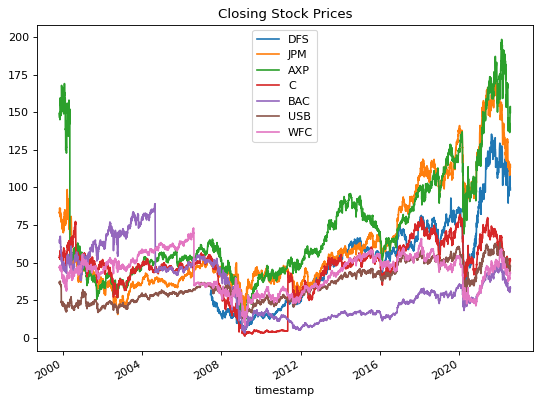

In [ ]:
# Plot closing prices for each stock over time
figure(figsize=(8, 6), dpi=80)

ax = plt.gca()

for i in tickers:
  df_n = df[(df.ticker==i)]
  df_n.plot(kind='line',x='timestamp',y='close',label=i, ax=ax, title='Closing Stock Prices')

plt.legend(tickers)

# Model 

In [ ]:
df.head()

,ticker,close,timestamp
0,DFS,98.36000,2022-07-26
1,DFS,100.02000,2022-07-25
2,DFS,100.00000,2022-07-22
3,DFS,100.00000,2022-07-21
4,DFS,109.80000,2022-07-20


In [ ]:
# Make dataframe for each stock for model
d = {}
for i in tickers:
  d[i] = df[(df.ticker==i)]
  d[i] = d[i][['timestamp','close']]
  d[i].columns = ['ds','y']


In [ ]:
# Create Stock Market Holiday Schedule :

mlk = pd.DataFrame({
  'holiday': 'mlk',
  'ds': pd.to_datetime(['2008-01-21','2009-01-19','2010-01-18','2011-01-17'
                        ,'2012-01-16','2013-01-21','2014-01-20','2015-01-19'
                        ,'2016-01-18','2017-01-16','2018-01-15','2019-01-21'
                        ,'2020-01-20','2021-01-18','2022-01-17'])
})


presday = pd.DataFrame({
  'holiday': 'presday',
  'ds': pd.to_datetime(['2008-02-18','2009-02-16','2010-02-15','2011-02-21'
                        ,'2012-02-20','2013-02-18','2014-02-17','2015-02-16'
                        ,'2016-02-15','2017-02-20','2018-02-19','2019-02-18'
                        ,'2020-02-17','2021-02-15','2022-02-21'])
})

goodfriday = pd.DataFrame({
  'holiday': 'goodfriday',
  'ds': pd.to_datetime(['2008-03-21','2009-04-10','2010-04-02','2011-04-22'
                        ,'2012-04-06','2013-03-29','2014-04-18','2015-04-03'
                        ,'2016-03-25','2017-04-14','2018-03-30','2019-04-19'
                        ,'2020-04-10','2021-04-02','2022-04-15'])
})

memorial = pd.DataFrame({
  'holiday': 'memorial',
  'ds': pd.to_datetime(['2008-05-26','2009-05-25','2010-05-31','2011-05-30'
                        ,'2012-05-28','2013-05-27','2014-05-26','2015-05-25'
                        ,'2016-05-30','2017-05-29','2018-05-28','2019-05-27'
                        ,'2020-05-25','2021-05-31','2022-05-30'])
})

juneteenth = pd.DataFrame({
  'holiday': 'juneteenth',
  'ds': pd.to_datetime(['2021-06-18','2009-05-20'])
})

independece = pd.DataFrame({
  'holiday': 'independece',
  'ds': pd.to_datetime(['2008-07-04','2009-07-03','2010-07-05','2011-07-04'
                        ,'2012-07-04','2013-07-04','2014-07-04','2015-07-03'
                        ,'2016-07-04','2017-07-04','2018-07-04','2019-07-04'
                        ,'2020-07-03','2021-07-05','2022-07-04'])
})

thanksgiving = pd.DataFrame({
  'holiday': 'thanksgiving',
  'ds': pd.to_datetime(['2008-11-27','2009-11-26','2010-11-25','2011-11-24'
                        ,'2012-11-22','2013-11-28','2014-11-27','2015-11-26'
                        ,'2016-11-24','2017-11-23','2018-11-22','2019-11-28'
                        ,'2020-11-26','2021-11-25','2022-11-24']),
                        'lower_window': 0,
                        'upper_window': 1
})


christmas = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2008-12-25','2009-12-25','2010-12-25','2011-12-25'
                        ,'2012-12-25','2013-12-25','2014-12-25','2015-12-25'
                        ,'2016-12-25','2017-12-25','2018-12-25','2019-12-25'
                        ,'2020-12-25','2021-12-25','2022-12-25']),
                        'lower_window': -1,
                        'upper_window': 0
})


holidays = pd.concat((mlk, presday, goodfriday, memorial, juneteenth, 
                      independece, thanksgiving, christmas))

In [ ]:
# Split data into train and test

from statsmodels.tools.eval_measures import rmse
from datetime import datetime

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

def stock_pred(data, iterations, dt):
  global results
  results_tmp = pd.DataFrame()
  test_len = iterations
  df_test = data[:test_len]
  df_train = data[test_len:]
  
  print("**********Stock: "+ i +"**********")
  print("----Training Data ----")
  print("Training data size: "+str(len(df_train)))
  print("Training Min Date: "+str(min(df_train['ds'])))
  print("Training Max Date: "+str(max(df_train['ds'])))

  print("""
  ----Testing Data ----""")
  df_test_min = min(df_test['ds'])
  df_test_max = max(df_test['ds'])
  print("Testing data size: "+str(len(df_test)))
  print("Testing Min Date: "+str(df_test_min))
  print("Testing Max Date: "+str(df_test_max))


  ##### Model

  m = Prophet(
    growth='linear',
    #daily_seasonality=False,
    #weekly_seasonality=True,
    #yearly_seasonality=True,
    holidays=holidays,
    changepoint_prior_scale=0.001,
    seasonality_mode="multiplicative"
    ).add_seasonality(
      name='monthly',
      period=30.5,
      fourier_order=5
    ).add_seasonality(
      name='quarterly',
      period=365.25/4,
      fourier_order=5,
      prior_scale=15)
  m.fit(df_train)

  # Create dataframe with the dates we want to predict
  future = m.make_future_dataframe(periods=120, freq='D')

  # Eliminate weekends from the future dataframe
  future['day'] = future['ds'].dt.weekday
  future = future[future['day']<=4]

  forecast=m.predict(future)

  # Plotting
  m.plot(forecast, uncertainty=True)
  plt.show()

  ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
  df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=(df_test_min,df_test_max))
  plt.show()

  y_pred = forecast.iloc[-iterations:]['yhat']
  y_true = df_test['y']

  ## Scoring Model
  RMSE =   rmse(y_pred, y_true)
  MAPE = mean_absolute_percentage_error(y_pred, y_true)

  dt = datetime.strptime(dt, '%Y-%m-%d')
  n_preds = forecast[forecast['ds']>=dt]

  tempdict = {
      'stock': i,
      'RMSE': RMSE,
      'MAPE': MAPE,
      'actual_dt': data['ds'].head(1),
      'actual': data['y'].head(1),

      'forecast_1_dt': n_preds['ds'].iloc[1],
      'forecast_1': n_preds['yhat'].iloc[1],

      'forecast_2_dt': n_preds['ds'].iloc[2],
      'forecast_2': n_preds['yhat'].iloc[2],

      'forecast_3_dt': n_preds['ds'].iloc[3],
      'forecast_3': n_preds['yhat'].iloc[3],
  }

  results_tmp = pd.DataFrame(tempdict, index=[0])

  print("RMSE: "+str(RMSE))
  print('MAPE: '+str(MAPE))

  print(results_tmp)
  print("--------------")
  print(data['ds'].loc[data['ds']==dt])
  results = pd.concat([results,results_tmp])


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**********Stock: DFS**********
----Training Data ----
Training data size: 3796
Training Min Date: 2007-06-14 00:00:00
Training Max Date: 2022-07-12 00:00:00

  ----Testing Data ----
Testing data size: 10
Testing Min Date: 2022-07-13 00:00:00
Testing Max Date: 2022-07-26 00:00:00


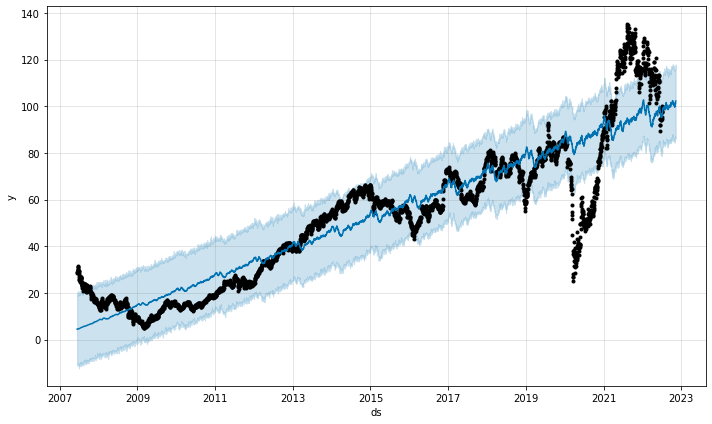

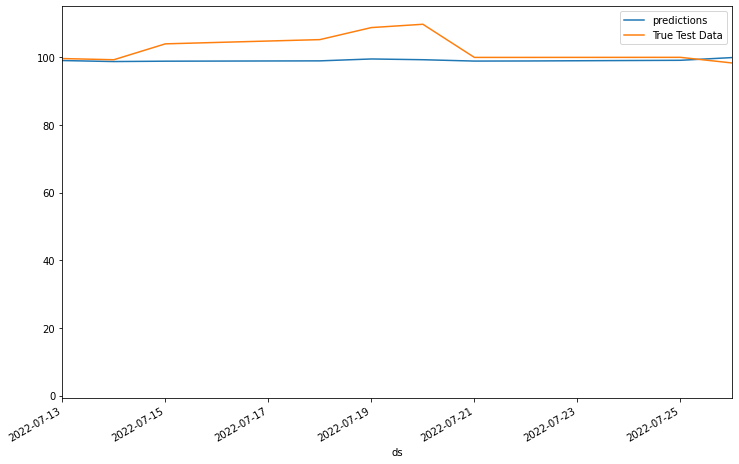

RMSE: 4.45557724228592
MAPE: 0.03345295939431382
  stock    RMSE    MAPE  actual_dt   actual forecast_1_dt  forecast_1  \
0   DFS 4.45558 0.03345 2022-07-26 98.36000    2022-07-27    99.97981   

  forecast_2_dt  forecast_2 forecast_3_dt  forecast_3  
0    2022-07-28    99.68464    2022-07-29    99.55641  
--------------
0   2022-07-26
Name: ds, dtype: datetime64[ns]
**********Stock: JPM**********
----Training Data ----
Training data size: 5710
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-07-12 00:00:00

  ----Testing Data ----
Testing data size: 10
Testing Min Date: 2022-07-13 00:00:00
Testing Max Date: 2022-07-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


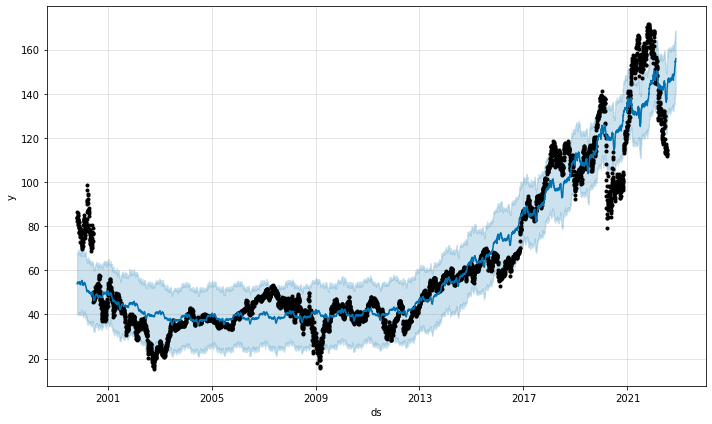

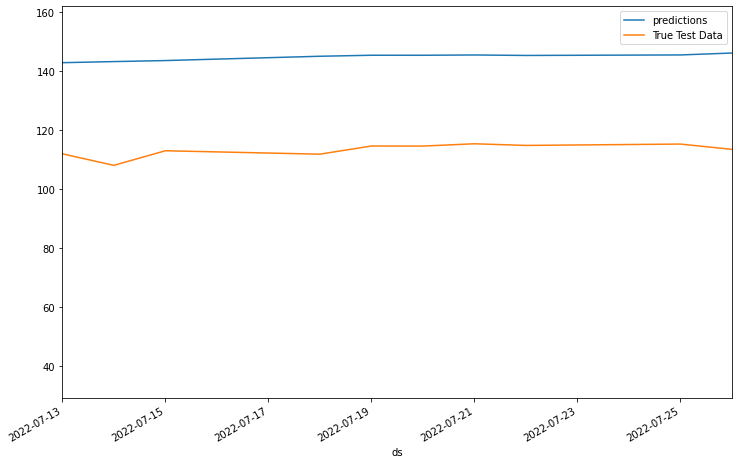

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 40.69932261009288
MAPE: 0.26366934741747833
  stock     RMSE    MAPE  actual_dt    actual forecast_1_dt  forecast_1  \
0   JPM 40.69932 0.26367 2022-07-26 113.42000    2022-07-27   146.53384   

  forecast_2_dt  forecast_2 forecast_3_dt  forecast_3  
0    2022-07-28   146.85188    2022-07-29   146.54431  
--------------
0   2022-07-26
Name: ds, dtype: datetime64[ns]
**********Stock: AXP**********
----Training Data ----
Training data size: 5710
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-07-12 00:00:00

  ----Testing Data ----
Testing data size: 10
Testing Min Date: 2022-07-13 00:00:00
Testing Max Date: 2022-07-26 00:00:00


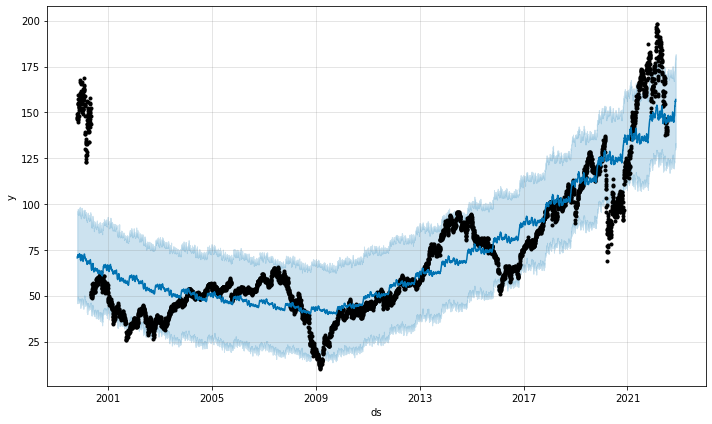

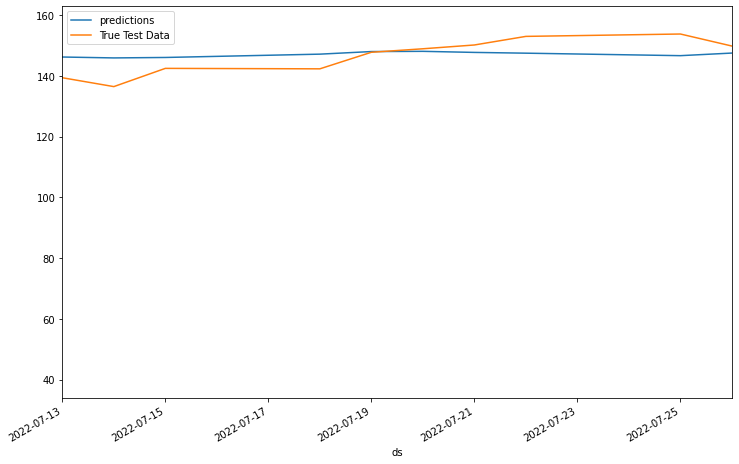

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 10.92460934247642
MAPE: 0.054752796333785894
  stock     RMSE    MAPE  actual_dt    actual forecast_1_dt  forecast_1  \
0   AXP 10.92461 0.05475 2022-07-26 149.83000    2022-07-27   148.03265   

  forecast_2_dt  forecast_2 forecast_3_dt  forecast_3  
0    2022-07-28   148.25940    2022-07-29   148.37087  
--------------
0   2022-07-26
Name: ds, dtype: datetime64[ns]
**********Stock: C**********
----Training Data ----
Training data size: 5710
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-07-12 00:00:00

  ----Testing Data ----
Testing data size: 10
Testing Min Date: 2022-07-13 00:00:00
Testing Max Date: 2022-07-26 00:00:00


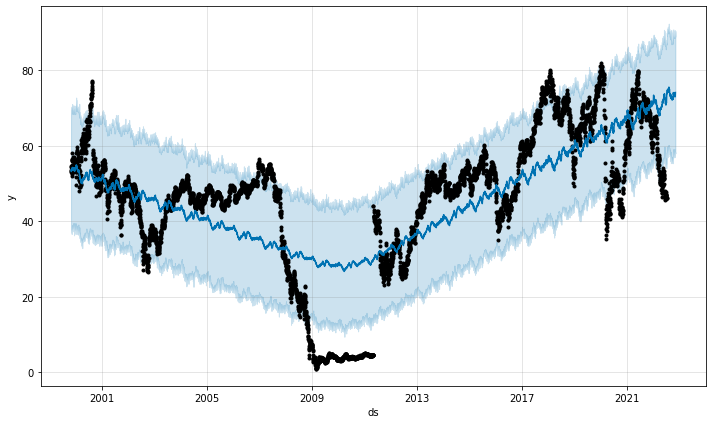

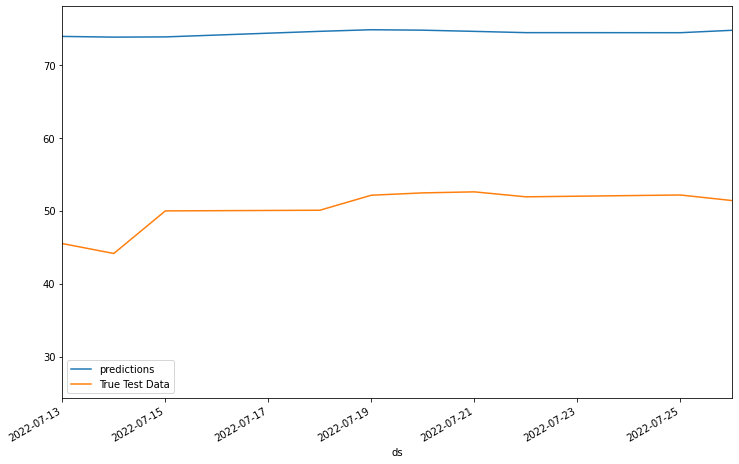

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 23.581767014552582
MAPE: 0.3177273125810197
  stock     RMSE    MAPE  actual_dt   actual forecast_1_dt  forecast_1  \
0     C 23.58177 0.31773 2022-07-26 51.40000    2022-07-27    74.92827   

  forecast_2_dt  forecast_2 forecast_3_dt  forecast_3  
0    2022-07-28    74.96955    2022-07-29    74.83525  
--------------
0   2022-07-26
Name: ds, dtype: datetime64[ns]
**********Stock: BAC**********
----Training Data ----
Training data size: 5710
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-07-12 00:00:00

  ----Testing Data ----
Testing data size: 10
Testing Min Date: 2022-07-13 00:00:00
Testing Max Date: 2022-07-26 00:00:00


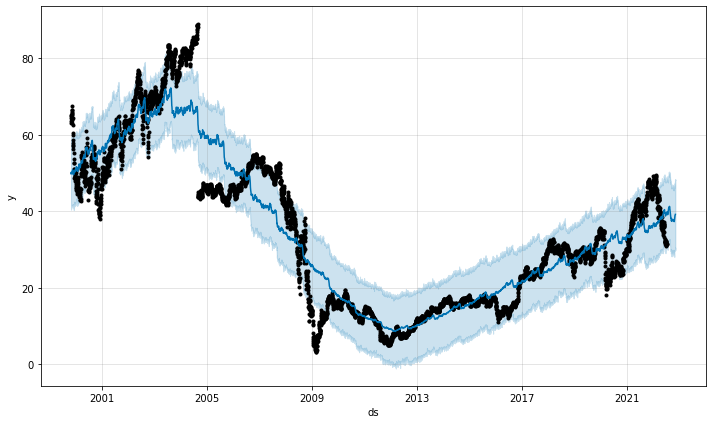

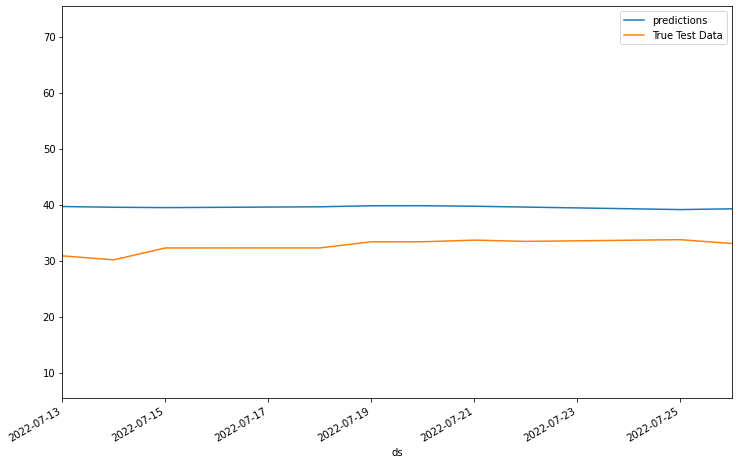

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 6.271018437843051
MAPE: 0.1569131676596383
  stock    RMSE    MAPE  actual_dt   actual forecast_1_dt  forecast_1  \
0   BAC 6.27102 0.15691 2022-07-26 33.05000    2022-07-27    39.35414   

  forecast_2_dt  forecast_2 forecast_3_dt  forecast_3  
0    2022-07-28    39.49575    2022-07-29    39.66155  
--------------
0   2022-07-26
Name: ds, dtype: datetime64[ns]
**********Stock: USB**********
----Training Data ----
Training data size: 5710
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-07-12 00:00:00

  ----Testing Data ----
Testing data size: 10
Testing Min Date: 2022-07-13 00:00:00
Testing Max Date: 2022-07-26 00:00:00


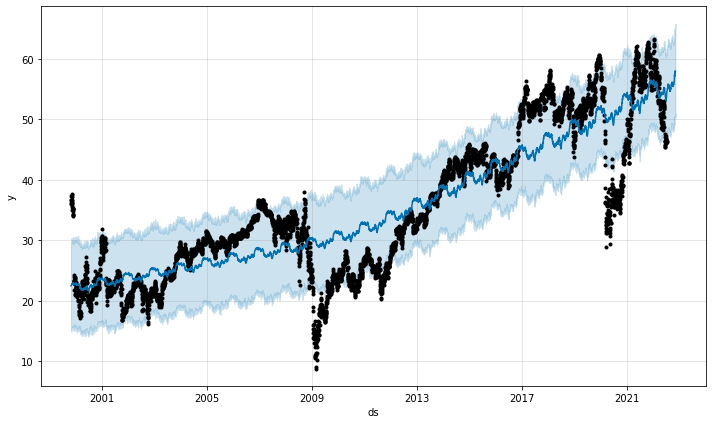

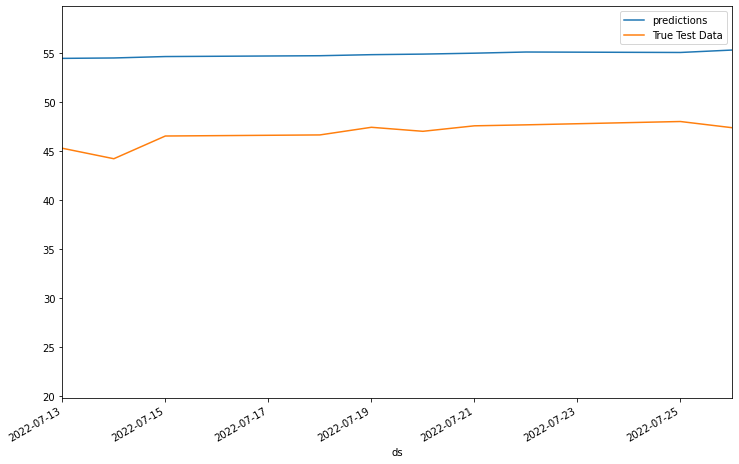

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 10.81914338012843
MAPE: 0.18642833100758527
  stock     RMSE    MAPE  actual_dt   actual forecast_1_dt  forecast_1  \
0   USB 10.81914 0.18643 2022-07-26 47.42000    2022-07-27    55.56950   

  forecast_2_dt  forecast_2 forecast_3_dt  forecast_3  
0    2022-07-28    55.75201    2022-07-29    55.83640  
--------------
0   2022-07-26
Name: ds, dtype: datetime64[ns]
**********Stock: WFC**********
----Training Data ----
Training data size: 5710
Training Min Date: 1999-11-01 00:00:00
Training Max Date: 2022-07-12 00:00:00

  ----Testing Data ----
Testing data size: 10
Testing Min Date: 2022-07-13 00:00:00
Testing Max Date: 2022-07-26 00:00:00


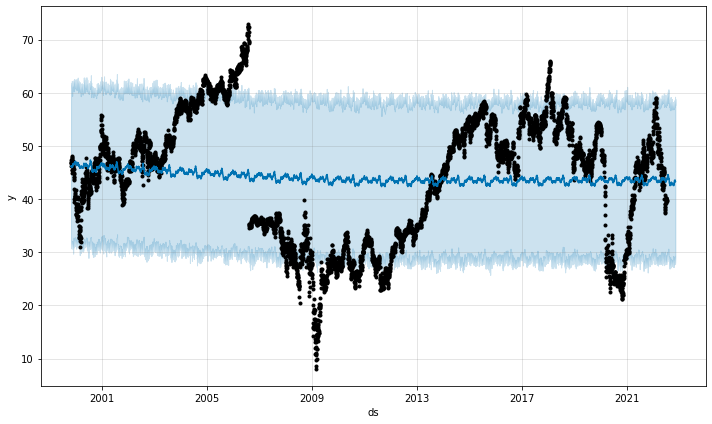

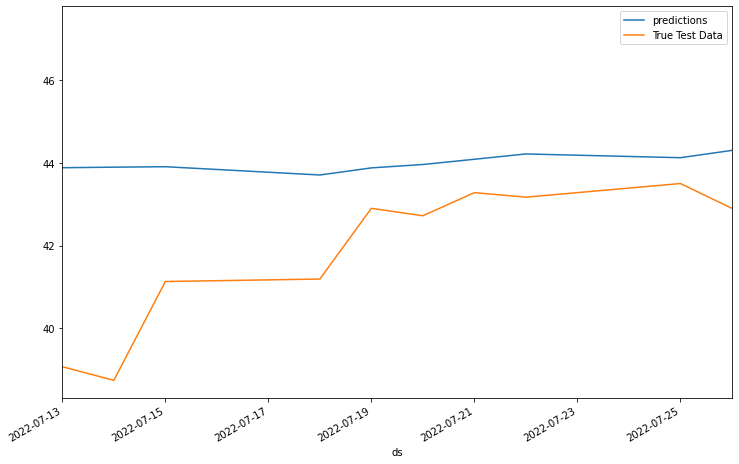

RMSE: 2.2280354652252137
MAPE: 0.03513607173894467
  stock    RMSE    MAPE  actual_dt   actual forecast_1_dt  forecast_1  \
0   WFC 2.22804 0.03514 2022-07-26 42.90000    2022-07-27    44.39417   

  forecast_2_dt  forecast_2 forecast_3_dt  forecast_3  
0    2022-07-28    44.51920    2022-07-29    44.61750  
--------------
0   2022-07-26
Name: ds, dtype: datetime64[ns]


In [ ]:
results = pd.DataFrame()

for i in d:
  stock_pred(d[i],10, '2022-07-26')

In [ ]:
results

,stock,RMSE,MAPE,actual_dt,actual,forecast_1_dt,forecast_1,forecast_2_dt,forecast_2,forecast_3_dt,forecast_3
0,DFS,4.45558,0.03345,2022-07-26,98.36000,2022-07-27,99.97981,2022-07-28,99.68464,2022-07-29,99.55641
0,JPM,40.69932,0.26367,2022-07-26,113.42000,2022-07-27,146.53384,2022-07-28,146.85188,2022-07-29,146.54431
0,AXP,10.92461,0.05475,2022-07-26,149.83000,2022-07-27,148.03265,2022-07-28,148.25940,2022-07-29,148.37087
0,C,23.58177,0.31773,2022-07-26,51.40000,2022-07-27,74.92827,2022-07-28,74.96955,2022-07-29,74.83525
0,BAC,6.27102,0.15691,2022-07-26,33.05000,2022-07-27,39.35414,2022-07-28,39.49575,2022-07-29,39.66155
0,USB,10.81914,0.18643,2022-07-26,47.42000,2022-07-27,55.56950,2022-07-28,55.75201,2022-07-29,55.83640
0,WFC,2.22804,0.03514,2022-07-26,42.90000,2022-07-27,44.39417,2022-07-28,44.51920,2022-07-29,44.61750


In [ ]:
results['FC_1_diff']= results['forecast_1'] - results['actual'] 
results['FC_2_diff']= results['forecast_2'] - results['actual'] 
results['FC_3_diff']= results['forecast_3'] - results['actual'] 

results['3_day_gain_avg'] = (results['FC_1_diff'] + results['FC_2_diff'] + results['FC_3_diff'])/3

In [ ]:
results

,stock,RMSE,MAPE,actual_dt,actual,forecast_1_dt,forecast_1,forecast_2_dt,forecast_2,forecast_3_dt,forecast_3,FC_1_diff,FC_2_diff,FC_3_diff,3_day_gain,3_day_gain_avg
0,DFS,4.45558,0.03345,2022-07-26,98.36000,2022-07-27,99.97981,2022-07-28,99.68464,2022-07-29,99.55641,1.61981,1.32464,1.19641,4.14087,1.38029
0,JPM,40.69932,0.26367,2022-07-26,113.42000,2022-07-27,146.53384,2022-07-28,146.85188,2022-07-29,146.54431,33.11384,33.43188,33.12431,99.67003,33.22334
0,AXP,10.92461,0.05475,2022-07-26,149.83000,2022-07-27,148.03265,2022-07-28,148.25940,2022-07-29,148.37087,-1.79735,-1.57060,-1.45913,-4.82707,-1.60902
0,C,23.58177,0.31773,2022-07-26,51.40000,2022-07-27,74.92827,2022-07-28,74.96955,2022-07-29,74.83525,23.52827,23.56955,23.43525,70.53306,23.51102
0,BAC,6.27102,0.15691,2022-07-26,33.05000,2022-07-27,39.35414,2022-07-28,39.49575,2022-07-29,39.66155,6.30414,6.44575,6.61155,19.36144,6.45381
0,USB,10.81914,0.18643,2022-07-26,47.42000,2022-07-27,55.56950,2022-07-28,55.75201,2022-07-29,55.83640,8.14950,8.33201,8.41640,24.89791,8.29930
0,WFC,2.22804,0.03514,2022-07-26,42.90000,2022-07-27,44.39417,2022-07-28,44.51920,2022-07-29,44.61750,1.49417,1.61920,1.71750,4.83087,1.61029
